In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23',)

In [10]:
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [11]:
# sel = [Measurements.date, 
#        func.avg(Measurements.prcp)]
# OneYearPrcp = session.query(*sel).filter(Measurements.date >= query_date).\
#     group_by(Measurements.date).order_by(Measurements.prcp).all()
# OneYearPrcp

In [11]:
OYP = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= query_date).all()
OYP

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
OYP_DF = pd.DataFrame(OYP, columns=['date', 'prcp'])
OYP_DF.sort_values('date')
OYP_DF.set_index('date', inplace=True)
print(OYP_DF)

            prcp
date            
2016-08-23  0.00
2016-08-24  0.08
2016-08-25  0.08
2016-08-26  0.00
2016-08-27  0.00
...          ...
2017-08-19  0.09
2017-08-20   NaN
2017-08-21  0.56
2017-08-22  0.50
2017-08-23  0.45

[2230 rows x 1 columns]


In [12]:
# Perform a query to retrieve the data and precipitation scores
OneYearPrcp = session.query(Measurements.date, func.avg(Measurements.prcp)).filter(Measurements.date >= query_date).\
group_by(Measurements.date).order_by(Measurements.date).all()
OneYearPrcp

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [26]:
OneYearPrcp_df = pd.DataFrame(OneYearPrcp, columns=['date', 'prcp'])
OneYearPrcp_df.set_index('date', inplace=True)
OneYearPrcp_df.sort_index(inplace=True)
print(OneYearPrcp_df)

                prcp
date                
2016-08-23  0.451667
2016-08-24  1.555000
2016-08-25  0.077143
2016-08-26  0.016667
2016-08-27  0.064000
...              ...
2017-08-19  0.030000
2017-08-20  0.005000
2017-08-21  0.193333
2017-08-22  0.166667
2017-08-23  0.132500

[366 rows x 1 columns]


In [14]:
# OneYearPrcp_df = pd.DataFrame(OneYearPrcp)
# OneYearPrcp_df.set_index('date', inplace=True)
# OneYearPrcp_df.sort_index(inplace=True)
# OneYearPrcp_df

In [15]:
#OneYearPrcp_df.isnull().sum()

prcp    0
dtype: int64

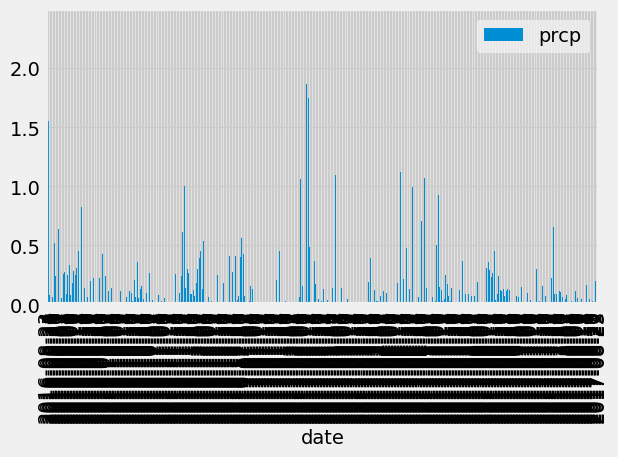

In [16]:
OneYearPrcp_df.plot.bar()
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Inches')

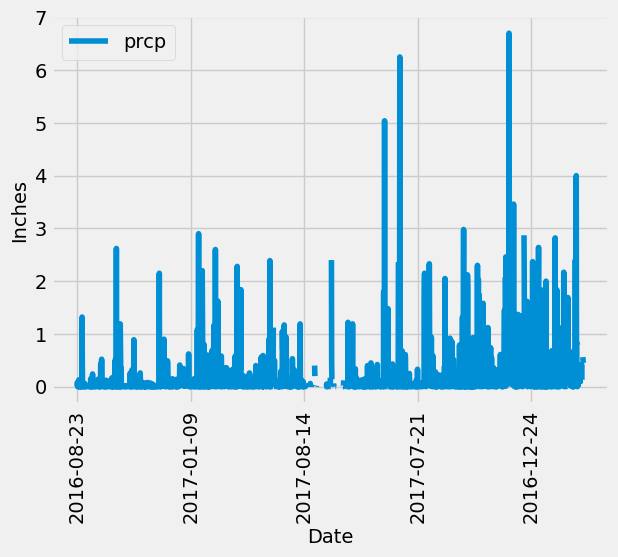

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
OYP_DF.plot(y= 'prcp', rot= 90)
plt.xlabel("Date")
plt.ylabel("Inches")
# plt.show()

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset


In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [24]:
# Close Session
session.close()